# Machine Learning (ML): Google Cloud Platform (GCP): TensorFlow (TF): Financial Time-Series
# Model 01 = Binary Classifier

## 1) Import Libraries

In [1]:
import StringIO

import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt

import gcp
import gcp.bigquery as bq

import tensorflow as tf

## 2) Install stuff

In [2]:
# Install xlrd
!pip install xlrd

Cleaning up...


## 3) Get the data from dropbox excel file

In [5]:
# Save file on dropbox.com
# Right click to get the link
force = 1

# url_data_raw = 'https://www.dropbox.com/s/t8egr3lqxlpzcj8/data_raw.xlsm' # (dropbox for wylie.chan@gmail.com)
# url_data_raw = 'https://www.dropbox.com/s/9hlf1lrmqfy093v/data_raw.xlsm' #  (dropbox for eyup.saltik.2016@gmail.com)  
url_data_raw = 'https://www.dropbox.com/s/hwkuunzjvj9vph5/data_raw_03.xlsm' # updated 2016/07/04

In [6]:
# Import file using url to file on dropbox
from urlparse import urlparse
from os.path import basename

bn_data_raw = basename(urlparse(url_data_raw).path)
print bn_data_raw

try:
    already_downloaded
except:
    already_downloaded = False
    
if force or not already_downloaded:
    already_downloaded = True
    !rm $bn_data_raw
    !wget $url_data_raw
#!ls -l

data_raw_03.xlsm
converted 'https://www.dropbox.com/s/hwkuunzjvj9vph5/data_raw_03.xlsm' (ANSI_X3.4-1968) -> 'https://www.dropbox.com/s/hwkuunzjvj9vph5/data_raw_03.xlsm' (UTF-8)
--2016-07-11 12:15:24--  https://www.dropbox.com/s/hwkuunzjvj9vph5/data_raw_03.xlsm
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/JLQwa60JWRpCqm8RU1doVHbx7Ph948cVW77mtRZxjLWxZ20Eeyh1eHW2CUG5Jfy5/file [following]
converted 'https://dl.dropboxusercontent.com/content_link/JLQwa60JWRpCqm8RU1doVHbx7Ph948cVW77mtRZxjLWxZ20Eeyh1eHW2CUG5Jfy5/file' (ANSI_X3.4-1968) -> 'https://dl.dropboxusercontent.com/content_link/JLQwa60JWRpCqm8RU1doVHbx7Ph948cVW77mtRZxjLWxZ20Eeyh1eHW2CUG5Jfy5/file' (UTF-8)
--2016-07-11 12:15:25--  https://dl.dropboxusercontent.com/content_link/JLQwa60JWRpCqm8RU1doVHbx7Ph948cVW77mtRZxjLWxZ20Eeyh1eHW2CUG5Jfy5

## 4) Read the Excel file raw data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd

# Read the excel data
data_raw = pd.read_excel(bn_data_raw, 'data_raw')
# data = pd.read_excel(bn_data_raw, 'data_raw', header=0, index_col=0, parse_cols=None)
  # parse_cols=None: parse all columns
  # header=0:    sets the row 0 as col labels (ie. headers)
  # index_col=0: sets the col 0 as row labels (ie. index)
data_raw.head() # display the first few lines

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,Ticker,USDMXN Curncy,ASURB MM Equity,BIMBOA MM Equity,CN1 Comdty,CT350188 Curncy,DU1 Comdty,ED749713@BVAL Corp,EMRUEMRU Index,EURMXN3Y Curncy,...,USSA25 ICPL Curncy,USSA30 ICPL Curncy,USSP15 CMPN Curncy,USSP20 CMPN Curncy,USSP25 CMPN Curncy,USSW15 CMPN Curncy,USSW20 CMPN Curncy,USSW25 CMPN Curncy,USSW30 CMPN Curncy,XQ1 Comdty
1,Date,USDMXN Curncy,ASURB MM Equity,BIMBOA MM Equity,CN1 Comdty,CT350188 Curncy,DU1 Comdty,ED749713@BVAL Corp,EMRUEMRU Index,EURMXN3Y Curncy,...,USSA25 ICPL Curncy,USSA30 ICPL Curncy,USSP15 CMPN Curncy,USSP20 CMPN Curncy,USSP25 CMPN Curncy,USSW15 CMPN Curncy,USSW20 CMPN Curncy,USSW25 CMPN Curncy,USSW30 CMPN Curncy,XQ1 Comdty
2,2016-05-27 00:00:00,18.4751,289.95,55.4,141.28,424.14,111.85,118.813,66.0342,35645.2,...,2.102,2.138,-10.63,-18,-31.63,1.943,2.074,2.133,2.1738,124.13
3,2016-05-26 00:00:00,18.4544,284.68,55.29,141.83,427.999,111.845,118.75,65.282,35316.9,...,2.104,2.139,-10.46,-17.65,-31.43,1.928,2.0575,2.125,2.1598,124.3
4,2016-05-25 00:00:00,18.4852,281.4,56.33,140.98,5392.86,111.825,118.438,65.9242,35680.2,...,2.107,2.14,-11.11,-18.4,-32.03,1.955,2.0825,2.1453,2.1785,124.11


## 5) Skip: Select only the columns that we have chosen from the PCA50 exercise

In [8]:
# This list pertains to first set of data.
# list_cols_pca = [ 0,1,
#                   1070,788,926,112,69,574,654,1160,527,323,
#                   397,118,774,1028,1034,655,907,736,251,388,
#                   327,243,705,303,1146,467,136,1006,600,15,
#                   231,290,131,782,20,1048,630,1173,431,856,
#                   67,299,838,639,53,932,870,938,1061
#                 ]
# data_raw_pca = data_raw[list_cols_pca]

# For our new data set, we take all 86 columns
data_raw_pca = data_raw
data_raw_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,Ticker,USDMXN Curncy,ASURB MM Equity,BIMBOA MM Equity,CN1 Comdty,CT350188 Curncy,DU1 Comdty,ED749713@BVAL Corp,EMRUEMRU Index,EURMXN3Y Curncy,...,USSA25 ICPL Curncy,USSA30 ICPL Curncy,USSP15 CMPN Curncy,USSP20 CMPN Curncy,USSP25 CMPN Curncy,USSW15 CMPN Curncy,USSW20 CMPN Curncy,USSW25 CMPN Curncy,USSW30 CMPN Curncy,XQ1 Comdty
1,Date,USDMXN Curncy,ASURB MM Equity,BIMBOA MM Equity,CN1 Comdty,CT350188 Curncy,DU1 Comdty,ED749713@BVAL Corp,EMRUEMRU Index,EURMXN3Y Curncy,...,USSA25 ICPL Curncy,USSA30 ICPL Curncy,USSP15 CMPN Curncy,USSP20 CMPN Curncy,USSP25 CMPN Curncy,USSW15 CMPN Curncy,USSW20 CMPN Curncy,USSW25 CMPN Curncy,USSW30 CMPN Curncy,XQ1 Comdty
2,2016-05-27 00:00:00,18.4751,289.95,55.4,141.28,424.14,111.85,118.813,66.0342,35645.2,...,2.102,2.138,-10.63,-18,-31.63,1.943,2.074,2.133,2.1738,124.13
3,2016-05-26 00:00:00,18.4544,284.68,55.29,141.83,427.999,111.845,118.75,65.282,35316.9,...,2.104,2.139,-10.46,-17.65,-31.43,1.928,2.0575,2.125,2.1598,124.3
4,2016-05-25 00:00:00,18.4852,281.4,56.33,140.98,5392.86,111.825,118.438,65.9242,35680.2,...,2.107,2.14,-11.11,-18.4,-32.03,1.955,2.0825,2.1453,2.1785,124.11


## 6) data_ticker_desc = Just a table to map column id to the ticker and name of the variable

In [9]:
data_ticker_desc = data_raw_pca.ix[:1] # 1st 2 rows
data_ticker_desc

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,Ticker,USDMXN Curncy,ASURB MM Equity,BIMBOA MM Equity,CN1 Comdty,CT350188 Curncy,DU1 Comdty,ED749713@BVAL Corp,EMRUEMRU Index,EURMXN3Y Curncy,...,USSA25 ICPL Curncy,USSA30 ICPL Curncy,USSP15 CMPN Curncy,USSP20 CMPN Curncy,USSP25 CMPN Curncy,USSW15 CMPN Curncy,USSW20 CMPN Curncy,USSW25 CMPN Curncy,USSW30 CMPN Curncy,XQ1 Comdty
1,Date,USDMXN Curncy,ASURB MM Equity,BIMBOA MM Equity,CN1 Comdty,CT350188 Curncy,DU1 Comdty,ED749713@BVAL Corp,EMRUEMRU Index,EURMXN3Y Curncy,...,USSA25 ICPL Curncy,USSA30 ICPL Curncy,USSP15 CMPN Curncy,USSP20 CMPN Curncy,USSP25 CMPN Curncy,USSW15 CMPN Curncy,USSW20 CMPN Curncy,USSW25 CMPN Curncy,USSW30 CMPN Curncy,XQ1 Comdty


## 7) data_values = the actual values of the 86 variables

In [10]:
data_values = data_raw_pca.ix[2:] # From row 2 onwards
data_values.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
2,2016-05-27 00:00:00,18.4751,289.95,55.4,141.28,424.14,111.85,118.813,66.0342,35645.2,...,2.102,2.138,-10.63,-18,-31.63,1.943,2.074,2.133,2.1738,124.13
3,2016-05-26 00:00:00,18.4544,284.68,55.29,141.83,427.999,111.845,118.75,65.282,35316.9,...,2.104,2.139,-10.46,-17.65,-31.43,1.928,2.0575,2.125,2.1598,124.3
4,2016-05-25 00:00:00,18.4852,281.4,56.33,140.98,5392.86,111.825,118.438,65.9242,35680.2,...,2.107,2.14,-11.11,-18.4,-32.03,1.955,2.0825,2.1453,2.1785,124.11
5,2016-05-24 00:00:00,18.487,282.81,56.06,141.16,5392.86,111.815,118.5,66.8658,36154.1,...,2.126,2.158,-11.18,-18.43,-31.94,1.9469,2.0703,2.1305,2.1615,124.24
6,2016-05-23 00:00:00,18.5161,282.02,55.27,141.31,5392.86,111.815,120.188,67.0104,36684.3,...,2.092,2.125,-10.81,-18.14,-31.55,1.9245,2.0503,2.112,2.1435,124.27


## 8) Set the dates as index of the dataframe

In [11]:
data_values_indexed = data_values.set_index([0])
data_values_indexed.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
2016-05-27,18.4751,289.95,55.4,141.28,424.14,111.85,118.813,66.0342,35645.2,161.89,...,2.102,2.138,-10.63,-18,-31.63,1.943,2.074,2.133,2.1738,124.13
2016-05-26,18.4544,284.68,55.29,141.83,427.999,111.845,118.75,65.282,35316.9,161.8,...,2.104,2.139,-10.46,-17.65,-31.43,1.928,2.0575,2.125,2.1598,124.3
2016-05-25,18.4852,281.4,56.33,140.98,5392.86,111.825,118.438,65.9242,35680.2,161.61,...,2.107,2.14,-11.11,-18.4,-32.03,1.955,2.0825,2.1453,2.1785,124.11
2016-05-24,18.487,282.81,56.06,141.16,5392.86,111.815,118.5,66.8658,36154.1,161.58,...,2.126,2.158,-11.18,-18.43,-31.94,1.9469,2.0703,2.1305,2.1615,124.24
2016-05-23,18.5161,282.02,55.27,141.31,5392.86,111.815,120.188,67.0104,36684.3,161.55,...,2.092,2.125,-10.81,-18.14,-31.55,1.9245,2.0503,2.112,2.1435,124.27


In [12]:
data_values_indexed.tail()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
2000-01-07,9.565,14.23,4.83,117.45,382.997,102.71,132.35,27.321,22485,119.16,...,7.475,7.465,87,89,84,7.39,7.41,6.461,7.4,98
2000-01-06,9.58,14.23,4.68,117.09,382.997,102.5,132.35,27.321,22485,118.7,...,7.505,7.48,89,90,84,7.43,7.44,6.461,7.43,97.7
2000-01-05,9.571,14.23,4.83,116.57,382.997,102.49,132.35,27.321,22485,119.15,...,7.475,7.455,88,89,84,7.47,7.48,6.461,7.46,97.55
2000-01-04,9.5713,14.23,4.83,117.5,382.997,102.49,132.35,27.54,22485,119.2,...,7.425,7.425,90,91,84,7.4,7.41,6.461,7.4,98
2000-01-03,9.505,14.23,5.03,118.5,382.997,102.47,132.35,27.54,22485,119.85,...,7.455,7.425,86,87,84,7.46,7.47,6.461,7.44,98.56


## 9) Fill any gaps in the data

In [13]:
# Pandas includes a very convenient function for filling gaps in the data.
data_values_indexed = data_values_indexed.fillna(method='ffill')
data_values_indexed.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
2016-05-27,18.4751,289.95,55.40,141.28,424.140,111.850,118.813,66.0342,35645.2148,161.89,...,2.102,2.138,-10.63,-18.00,-31.63,1.9430,2.0740,2.1330,2.1738,124.13
2016-05-26,18.4544,284.68,55.29,141.83,427.999,111.845,118.750,65.2820,35316.8828,161.80,...,2.104,2.139,-10.46,-17.65,-31.43,1.9280,2.0575,2.1250,2.1598,124.30
2016-05-25,18.4852,281.40,56.33,140.98,5392.863,111.825,118.438,65.9242,35680.2227,161.61,...,2.107,2.140,-11.11,-18.40,-32.03,1.9550,2.0825,2.1453,2.1785,124.11
2016-05-24,18.4870,282.81,56.06,141.16,5392.863,111.815,118.500,66.8658,36154.1172,161.58,...,2.126,2.158,-11.18,-18.43,-31.94,1.9469,2.0703,2.1305,2.1615,124.24
2016-05-23,18.5161,282.02,55.27,141.31,5392.863,111.815,120.188,67.0104,36684.3047,161.55,...,2.092,2.125,-10.81,-18.14,-31.55,1.9245,2.0503,2.1120,2.1435,124.27


# Exploratory data analysis

Exploratory Data Analysis (EDA) is foundational to working with machine learning, and any other sort of analysis. EDA means getting to know your data, getting your fingers dirty with your data, feeling it and seeing it. The end result is you know your data very well, so when you build models you build them based on an actual, practical, physical understanding of the data, not assumptions or vaguely held notions. You can still make assumptions of course, but EDA means you will understand your assumptions and why you're making those assumptions. 

First, take a look at the data.

## 10) Describe the data briefly

In [14]:
data_values_indexed.describe()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
count,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,...,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000
mean,11.911366,73.947745,18.881708,119.598056,1274.780457,106.901370,129.810225,32.755946,21444.728984,135.740386,...,4.514619,4.538804,52.535717,48.223883,33.826551,4.348641,4.476098,4.485189,4.547887,110.571528
std,1.994357,68.242552,14.150547,12.524152,1459.830658,3.125247,6.684781,10.467811,4250.049262,13.389009,...,1.388181,1.372625,30.698940,34.171762,34.130836,1.431227,1.400364,1.305526,1.362411,7.591973
min,8.970000,8.500000,2.840000,97.110000,182.532000,101.100000,92.985000,23.089000,9962.501200,114.210000,...,1.887000,1.928000,-13.840000,-26.250000,-37.500000,1.737800,1.863300,1.924300,1.960500,96.480000
25%,10.635750,21.275000,5.760000,109.847500,382.997000,103.995000,128.298000,28.140375,18765.977525,126.027500,...,3.274000,3.312750,28.690000,18.985000,0.310000,3.074000,3.236875,3.303000,3.337750,106.400000
50%,11.357750,51.995000,15.455000,117.300000,541.548000,106.467500,132.350000,29.795000,22347.502700,131.550000,...,4.805000,4.822000,53.615000,54.730000,49.500000,4.633750,4.770500,4.815500,4.832500,106.400000
75%,13.057125,96.162500,29.980000,131.025000,1690.914000,110.320000,132.350000,31.731000,22485.002700,146.980000,...,5.445000,5.450000,72.630000,71.000000,60.212500,5.309250,5.415125,5.448500,5.451125,117.092500
max,19.147600,290.260000,57.020000,146.130000,6937.675000,111.950000,153.093000,84.856000,45139.001500,171.340000,...,7.875000,7.855000,146.010000,151.500000,108.500000,7.886000,7.863000,6.636000,7.800000,135.840000


You can see that the various indices operate on scales differing by orders of magnitude. It's best to scale the data so that, for example, operations involving multiple indices aren't unduly influenced by a single, massive index.


## 11) Plot the data

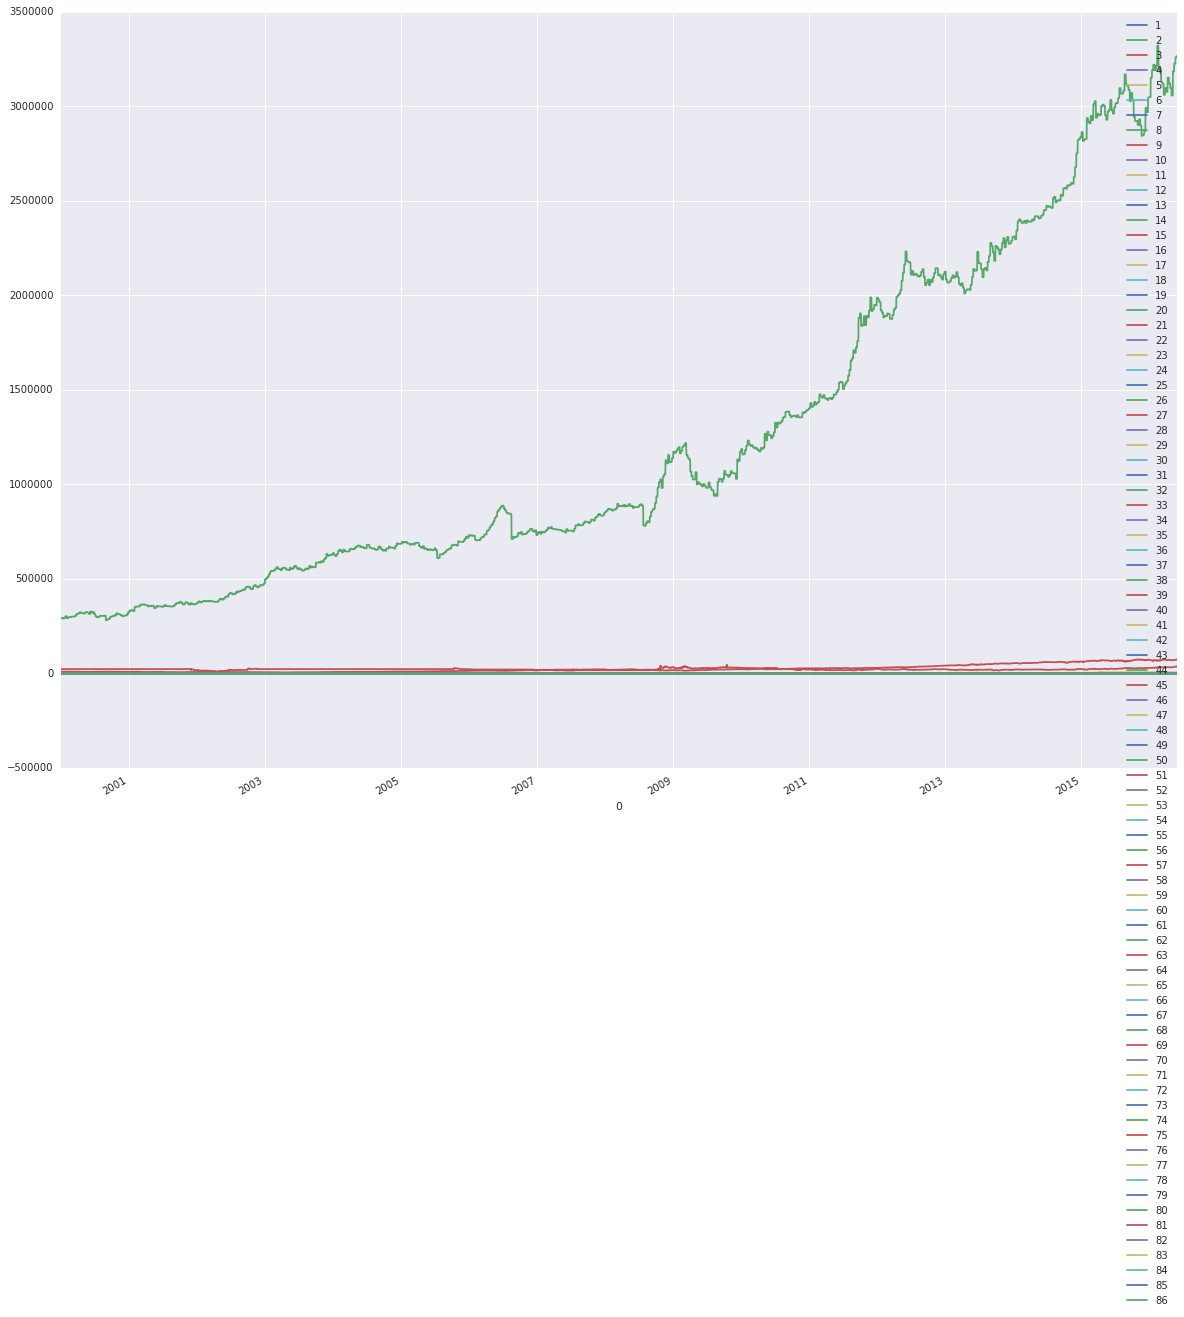

In [15]:
# N.B. A super-useful trick-ette is to assign the return value of plot to _ 
# so that you don't get text printed before the plot itself.

# _ = pd.concat([data_values_indexed[1],
#   data_values_indexed[1070],
#   data_values_indexed[788],
#   data_values_indexed[926]], axis=1).plot(figsize=(20, 15))

_ = data_values_indexed.plot(figsize=(20, 15))

As expected, the structure isn't uniformly visible for the indices. Divide each value in an individual index by the maximum value for that index., and then replot. The maximum value of all indices will be 1.

## 12) Calculate the max value for each column, prepare to scale data for each column

In [16]:
data_values_indexed_max = data_values_indexed.max(axis=0) # max across axis 0 = rows
data_values_indexed_max.head()

1      19.1476
2     290.2600
3      57.0200
4     146.1300
5    6937.6750
dtype: float64

## 13) Scale the data

In [17]:
data_values_indexed_scaled = data_values_indexed / data_values_indexed_max
data_values_indexed_scaled.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
2016-05-27,0.964878,0.998932,0.971589,0.966810,0.061136,0.999107,0.776084,0.778191,0.789677,0.944847,...,0.266921,0.272183,-0.072803,-0.118812,-0.291521,0.246386,0.263767,0.321429,0.278692,0.913796
2016-05-26,0.963797,0.980776,0.969660,0.970574,0.061692,0.999062,0.775672,0.769327,0.782403,0.944321,...,0.267175,0.272311,-0.071639,-0.116502,-0.289677,0.244484,0.261669,0.320223,0.276897,0.915047
2016-05-25,0.965406,0.969476,0.987899,0.964757,0.777330,0.998883,0.773634,0.776895,0.790452,0.943212,...,0.267556,0.272438,-0.076091,-0.121452,-0.295207,0.247908,0.264848,0.323282,0.279295,0.913648
2016-05-24,0.965500,0.974333,0.983164,0.965989,0.777330,0.998794,0.774039,0.787991,0.800951,0.943037,...,0.269968,0.274729,-0.076570,-0.121650,-0.294378,0.246881,0.263296,0.321052,0.277115,0.914605
2016-05-23,0.967019,0.971612,0.969309,0.967016,0.777330,0.998794,0.785065,0.789695,0.812696,0.942862,...,0.265651,0.270528,-0.074036,-0.119736,-0.290783,0.244040,0.260753,0.318264,0.274808,0.914826


## 14) Plot the scaled data

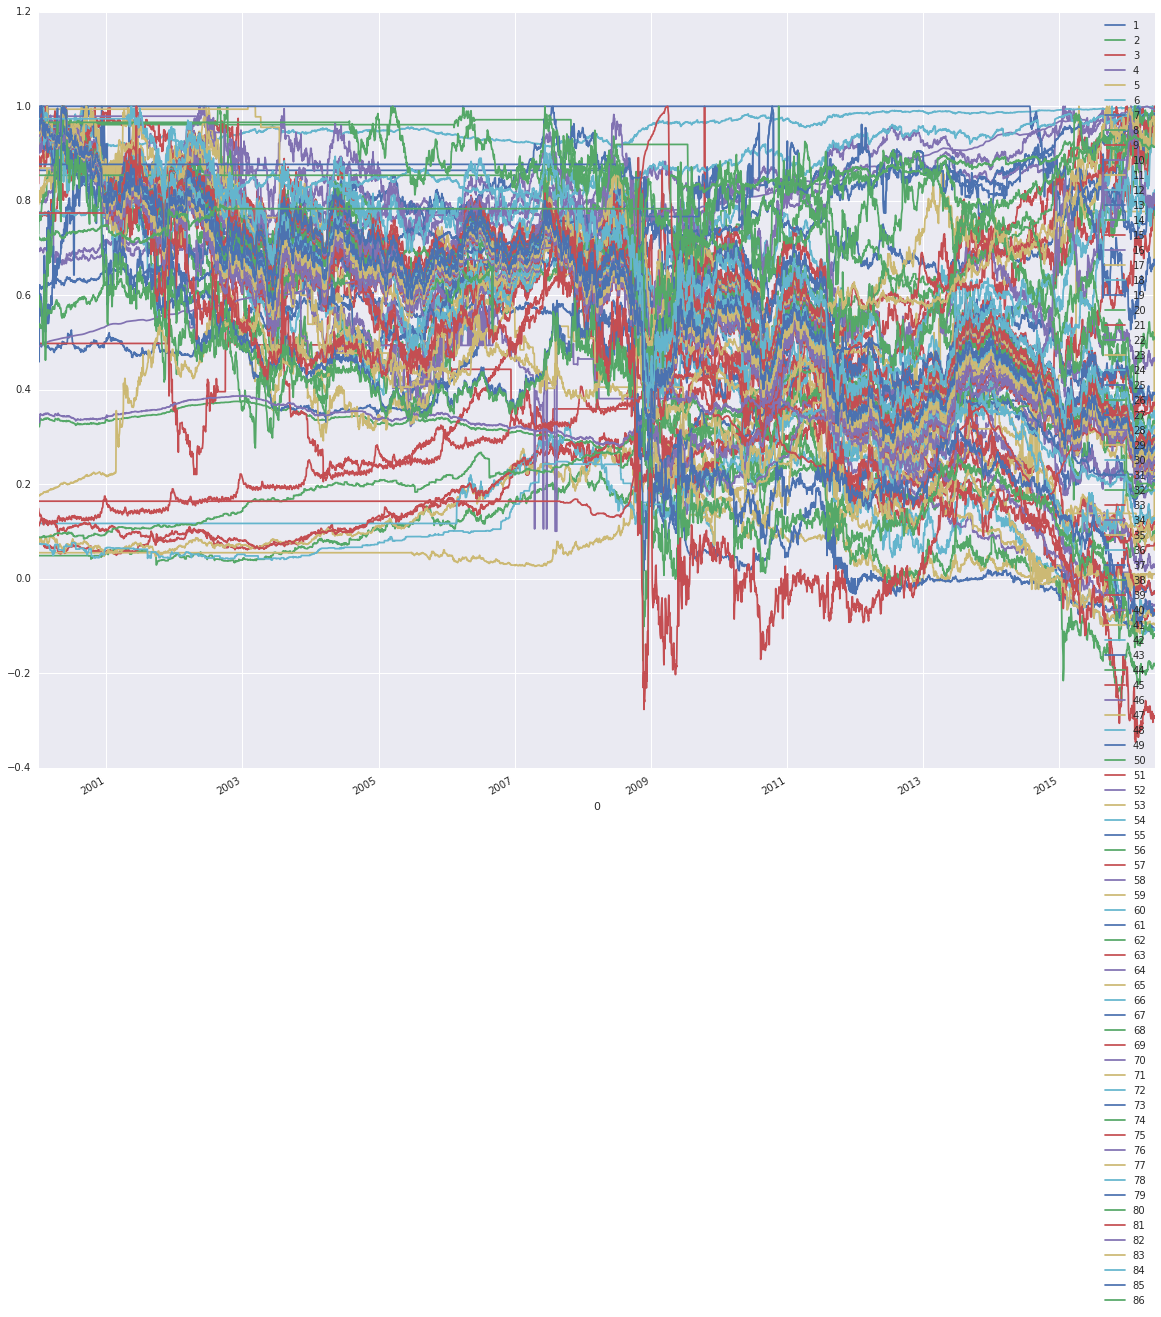

In [18]:
_ = data_values_indexed_scaled.plot(figsize=(20, 15))

## 15) Auto-correlations

Next, plot autocorrelations for each of the indices. The autocorrelations determine correlations between current values of the index and lagged values of the same index. The goal is to determine whether the lagged values are reliable indicators of the current values. If they are, then we've identified a correlation.

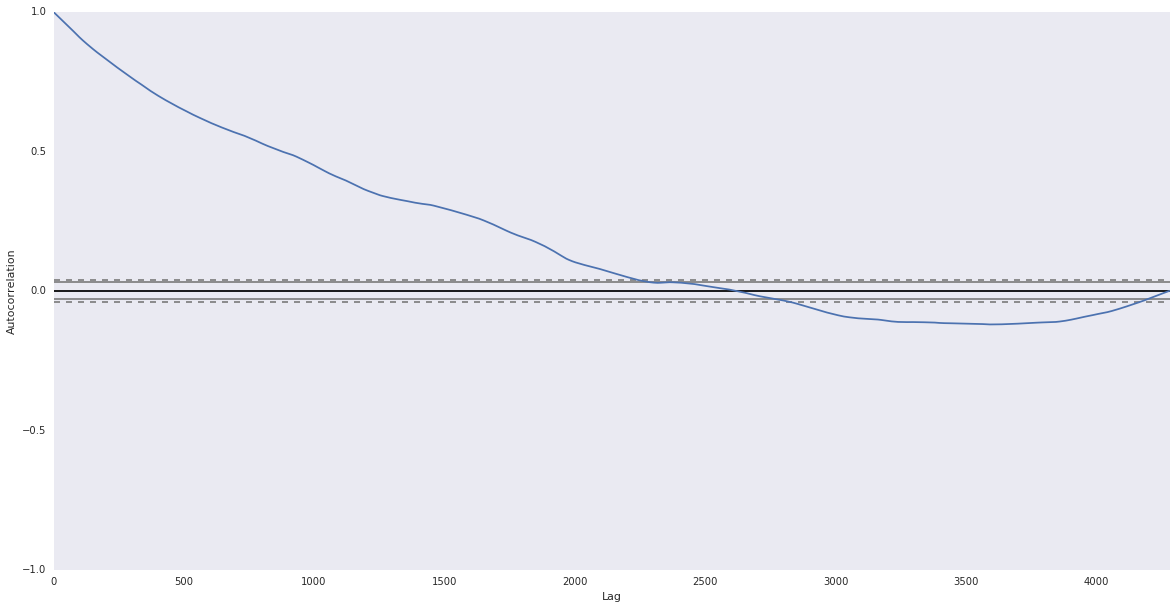

In [19]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

_ = autocorrelation_plot(data_values_indexed_scaled)

For 2300 lagged days, we observe positive auto-correlations.
This suggests that as the variables increase, they tend to keep on increasing. Momentum.

After 2300 lagged days, we observe negative auto-correlations.

## 16) Skip: Just a reminder of the PCA columns we selected earlier

In [20]:
# list_cols_pca = [ 0,1,
#                   1070,788,926,112,69,574,654,1160,527,323,
#                   397,118,774,1028,1034,655,907,736,251,388,
#                   327,243,705,303,1146,467,136,1006,600,15,
#                   231,290,131,782,20,1048,630,1173,431,856,
#                   67,299,838,639,53,932,870,938,1061
#                 ]

## 17) Scatter plots of the first 20 of our 86 variables vs USDMXN(varid=1)

In [ ]:
# _ = scatter_matrix(data_values_indexed_scaled)
dvis = data_values_indexed_scaled

_ = scatter_matrix(
      pd.concat(
      [ 
        dvis[ 1],dvis[ 2],dvis[ 3],dvis[ 4],dvis[ 5],dvis[ 6],dvis[ 7],dvis[ 8],dvis[ 9],dvis[10],
        dvis[11],dvis[12],dvis[13],dvis[14],dvis[15],dvis[16],dvis[17],dvis[18],dvis[19],dvis[20],
      ], axis=1), figsize=(15, 15), diagonal='kde')

## 18) Remind ourselves what our scaled data (of price or index LEVELS) looks like

In [20]:
data_values_indexed_scaled.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
2016-05-27,0.964878,0.998932,0.971589,0.966810,0.061136,0.999107,0.776084,0.778191,0.789677,0.944847,...,0.266921,0.272183,-0.072803,-0.118812,-0.291521,0.246386,0.263767,0.321429,0.278692,0.913796
2016-05-26,0.963797,0.980776,0.969660,0.970574,0.061692,0.999062,0.775672,0.769327,0.782403,0.944321,...,0.267175,0.272311,-0.071639,-0.116502,-0.289677,0.244484,0.261669,0.320223,0.276897,0.915047
2016-05-25,0.965406,0.969476,0.987899,0.964757,0.777330,0.998883,0.773634,0.776895,0.790452,0.943212,...,0.267556,0.272438,-0.076091,-0.121452,-0.295207,0.247908,0.264848,0.323282,0.279295,0.913648
2016-05-24,0.965500,0.974333,0.983164,0.965989,0.777330,0.998794,0.774039,0.787991,0.800951,0.943037,...,0.269968,0.274729,-0.076570,-0.121650,-0.294378,0.246881,0.263296,0.321052,0.277115,0.914605
2016-05-23,0.967019,0.971612,0.969309,0.967016,0.777330,0.998794,0.785065,0.789695,0.812696,0.942862,...,0.265651,0.270528,-0.074036,-0.119736,-0.290783,0.244040,0.260753,0.318264,0.274808,0.914826


## 19) Calculate Log Returns on our scaled data

In [21]:
data_values_indexed_scaled_logret = pd.DataFrame()
data_values_indexed_scaled_logret = np.log(data_values_indexed_scaled/data_values_indexed_scaled.shift(-1)) # note dates are reverse-chrono

data_values_indexed_scaled_logret.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
2016-05-27,0.001121,0.018343,0.001988,-0.003885,-0.009057,0.000045,0.000530,0.011456,0.009254,0.000556,...,-0.000951,-0.000468,0.016122,0.019636,0.006343,0.007750,0.007987,0.003758,0.006461,-0.001369
2016-05-26,-0.001668,0.011589,-0.018635,0.006011,-2.533711,0.000179,0.002631,-0.009789,-0.010235,0.001175,...,-0.001425,-0.000467,-0.060287,-0.041615,-0.018910,-0.013907,-0.012077,-0.009508,-0.008621,0.001530
2016-05-25,-0.000097,-0.004998,0.004805,-0.001276,0.000000,0.000089,-0.000523,-0.014182,-0.013194,0.000186,...,-0.008977,-0.008376,-0.006281,-0.001629,0.002814,0.004152,0.005876,0.006923,0.007834,-0.001047
2016-05-24,-0.001573,0.002797,0.014192,-0.001062,0.000000,0.000000,-0.014144,-0.002160,-0.014558,0.000186,...,0.016122,0.015410,0.033655,0.015860,0.012286,0.011572,0.009707,0.008721,0.008362,-0.000241
2016-05-23,0.009202,-0.010371,0.001630,0.000000,0.000000,0.000000,0.008355,0.008190,0.027879,-0.000186,...,-0.000478,0.000942,-0.011954,-0.010965,-0.019772,-0.001039,-0.000098,0.000474,0.000373,0.000000


In [22]:
data_values_indexed_scaled_logret.tail()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
2000-01-07,-0.001567,0.0,0.031548,0.003070,0.0,0.002047,0.0,0.000000,0.0,0.003868,...,-0.004005,-0.002007,-0.022728,-0.011173,0.0,-0.005398,-0.004040,0.0,-0.004046,0.003066
2000-01-06,0.000940,0.0,-0.031548,0.004451,0.0,0.000098,0.0,0.000000,0.0,-0.003784,...,0.004005,0.003348,0.011300,0.011173,0.0,-0.005369,-0.005362,0.0,-0.004030,0.001536
2000-01-05,-0.000031,0.0,0.000000,-0.007946,0.0,0.000000,0.0,-0.007984,0.0,-0.000420,...,0.006711,0.004032,-0.022473,-0.022223,0.0,0.009415,0.009402,0.0,0.008075,-0.004602
2000-01-04,0.006951,0.0,-0.040574,-0.008475,0.0,0.000195,0.0,0.000000,0.0,-0.005438,...,-0.004032,0.000000,0.045462,0.044951,0.0,-0.008075,-0.008065,0.0,-0.005391,-0.005698
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_values_indexed_scaled_logret.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
count,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,...,4279.000000,4279.000000,4272.000000,4268.000000,4188.000000,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000
mean,0.000155,0.000704,0.000561,0.000041,0.000024,0.000020,-0.000025,0.000204,0.000108,0.000070,...,-0.000296,-0.000291,-0.001033,-0.000457,0.003916,-0.000314,-0.000299,-0.000259,-0.000288,0.000054
std,0.006767,0.020758,0.018348,0.004671,0.056952,0.000857,0.010165,0.007858,0.026633,0.003441,...,0.014873,0.014742,0.099875,0.149852,0.309003,0.016310,0.015431,0.015251,0.015189,0.004516
min,-0.066527,-0.614143,-0.101624,-0.190591,-2.533711,-0.007372,-0.166175,-0.123921,-0.385704,-0.024960,...,-0.136928,-0.131822,-3.135494,-3.277145,-3.624341,-0.112705,-0.105936,-0.114583,-0.109933,-0.178882
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.070259,0.137621,0.133531,0.020071,0.700986,0.005774,0.229973,0.108471,0.697777,0.083623,...,0.072736,0.082584,1.823012,4.235250,4.605170,0.081709,0.082212,0.079560,0.085061,0.176596


In [24]:
# 2000/01/07 to 2016/05/27 = 1 header row + 4279 data rows
# print data_values_indexed_scaled_logret.head()
# print data_values_indexed_scaled_logret.tail()
print 'NumRowsIncludeHeader = len(data_values_indexed_scaled_logret) = ' + str(len(data_values_indexed_scaled_logret))

NumRowsIncludeHeader = len(data_values_indexed_scaled_logret) = 4280


## 20) Replace inf, NaN in data with Zero

In [25]:
data_values_indexed_scaled_logret = data_values_indexed_scaled_logret.replace([np.inf, -np.inf, np.nan], 0)
data_values_indexed_scaled_logret.describe()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
count,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,...,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000
mean,0.000155,0.000704,0.000561,0.000041,0.000024,0.000020,-0.000025,0.000204,0.000108,0.000070,...,-0.000296,-0.000291,-0.001031,-0.000455,0.003832,-0.000314,-0.000299,-0.000259,-0.000287,0.000054
std,0.006766,0.020756,0.018346,0.004670,0.056946,0.000857,0.010163,0.007857,0.026630,0.003441,...,0.014871,0.014741,0.099782,0.149642,0.305663,0.016308,0.015429,0.015249,0.015187,0.004515
min,-0.066527,-0.614143,-0.101624,-0.190591,-2.533711,-0.007372,-0.166175,-0.123921,-0.385704,-0.024960,...,-0.136928,-0.131822,-3.135494,-3.277145,-3.624341,-0.112705,-0.105936,-0.114583,-0.109933,-0.178882
25%,-0.003348,-0.005990,-0.008798,-0.001978,-0.003060,-0.000318,0.000000,-0.001618,-0.002285,-0.001332,...,-0.007909,-0.007626,-0.014193,-0.015385,-0.017404,-0.009126,-0.008614,-0.007847,-0.008084,-0.000083
50%,-0.000076,0.000000,0.000000,0.000085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000073,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000506,-0.000525,0.000000,-0.000524,0.000000
75%,0.003311,0.008082,0.009255,0.002250,0.002376,0.000407,0.000000,0.001508,0.002399,0.001593,...,0.007045,0.006817,0.013674,0.015038,0.017994,0.008153,0.007748,0.007054,0.007396,0.000350
max,0.070259,0.137621,0.133531,0.020071,0.700986,0.005774,0.229973,0.108471,0.697777,0.083623,...,0.072736,0.082584,1.823012,4.235250,4.605170,0.081709,0.082212,0.079560,0.085061,0.176596


## 21) Skip: Fill the Gaps

In [26]:
# Pandas includes a very convenient function for filling gaps in the data.
# data_values_indexed_scaled_logret = data_values_indexed_scaled_logret.fillna(method='ffill')
data_values_indexed_scaled_logret.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
2016-05-27,0.001121,0.018343,0.001988,-0.003885,-0.009057,0.000045,0.000530,0.011456,0.009254,0.000556,...,-0.000951,-0.000468,0.016122,0.019636,0.006343,0.007750,0.007987,0.003758,0.006461,-0.001369
2016-05-26,-0.001668,0.011589,-0.018635,0.006011,-2.533711,0.000179,0.002631,-0.009789,-0.010235,0.001175,...,-0.001425,-0.000467,-0.060287,-0.041615,-0.018910,-0.013907,-0.012077,-0.009508,-0.008621,0.001530
2016-05-25,-0.000097,-0.004998,0.004805,-0.001276,0.000000,0.000089,-0.000523,-0.014182,-0.013194,0.000186,...,-0.008977,-0.008376,-0.006281,-0.001629,0.002814,0.004152,0.005876,0.006923,0.007834,-0.001047
2016-05-24,-0.001573,0.002797,0.014192,-0.001062,0.000000,0.000000,-0.014144,-0.002160,-0.014558,0.000186,...,0.016122,0.015410,0.033655,0.015860,0.012286,0.011572,0.009707,0.008721,0.008362,-0.000241
2016-05-23,0.009202,-0.010371,0.001630,0.000000,0.000000,0.000000,0.008355,0.008190,0.027879,-0.000186,...,-0.000478,0.000942,-0.011954,-0.010965,-0.019772,-0.001039,-0.000098,0.000474,0.000373,0.000000


## 22) Plot log returns of scaled data

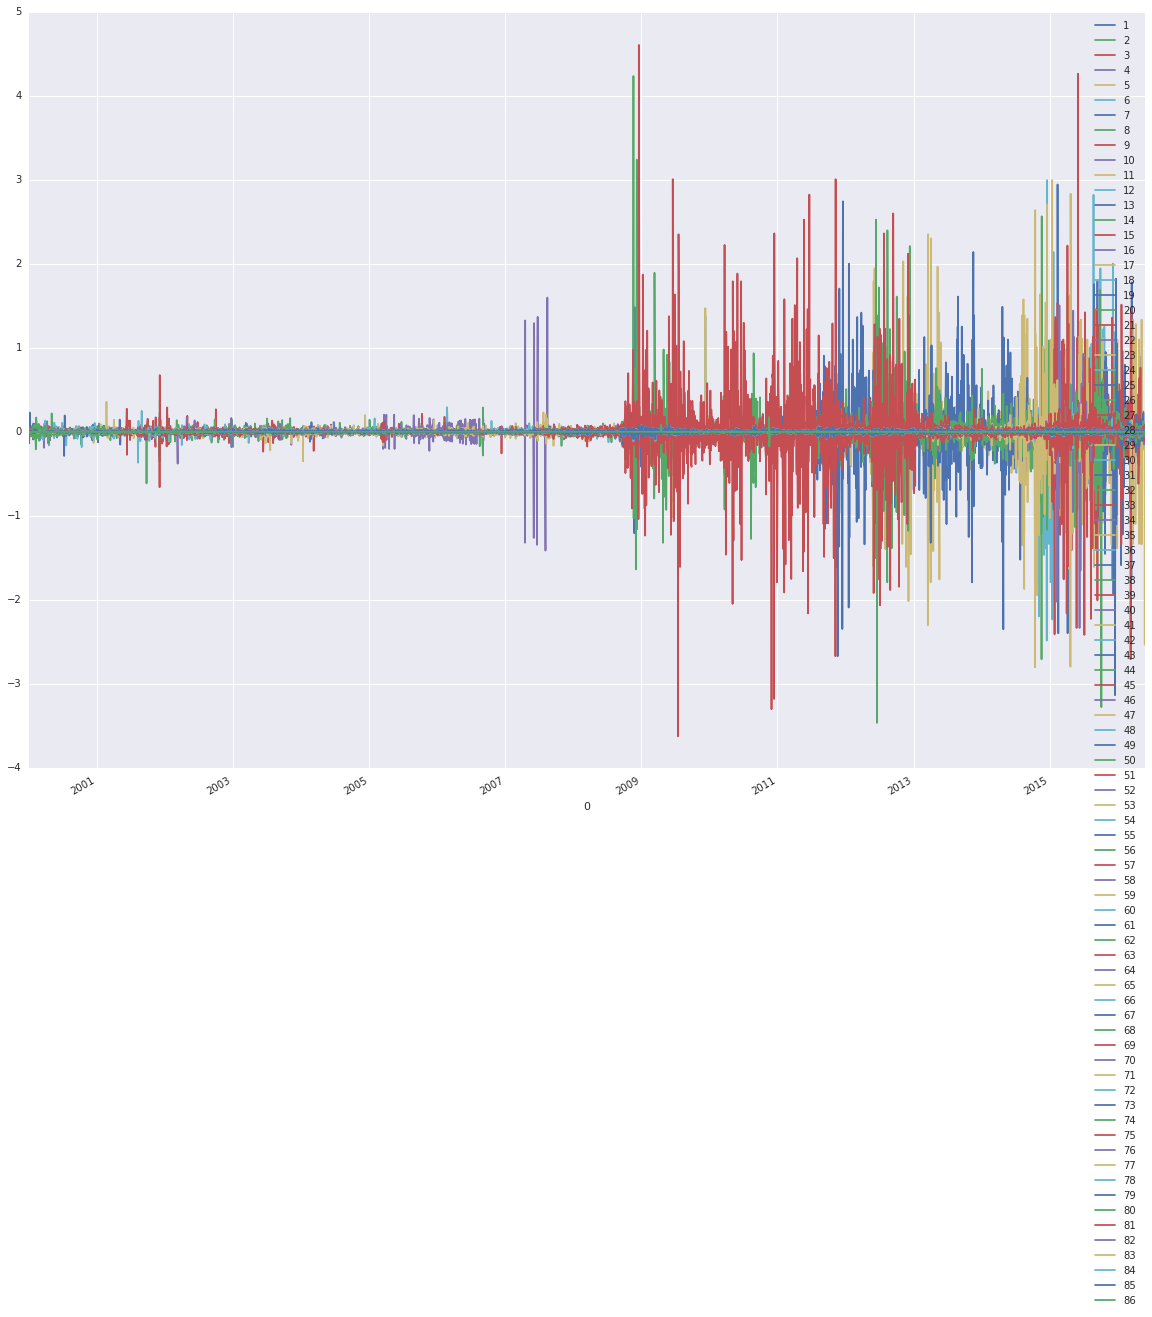

In [27]:
_ = data_values_indexed_scaled_logret.plot(figsize=(20, 15))

## 23) Auto-Correlations of log returns of scaled data

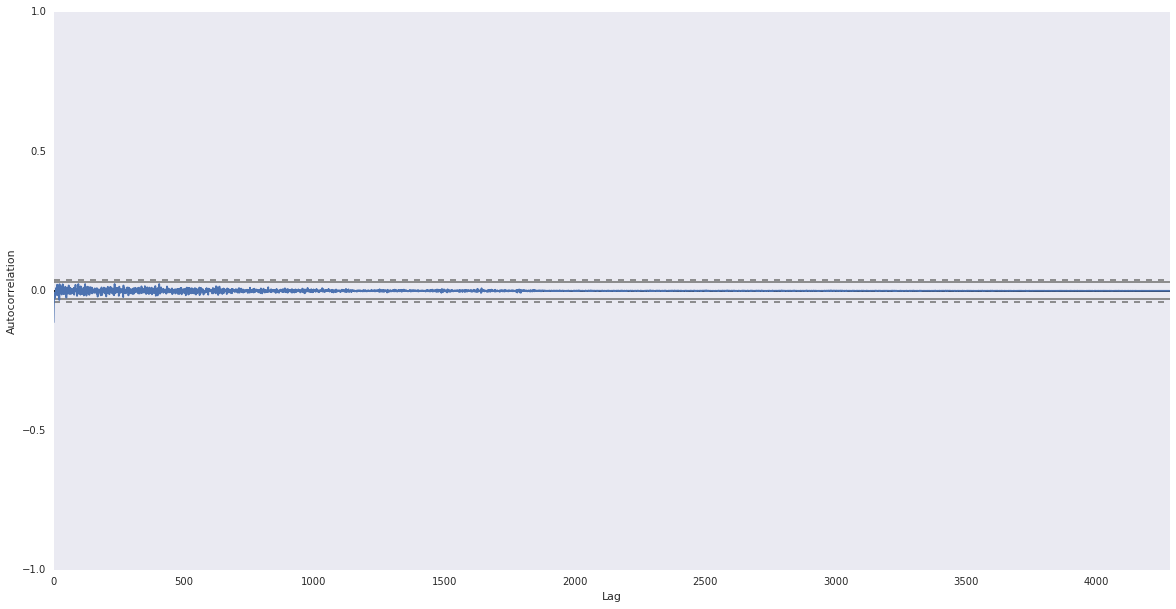

In [28]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

_ = autocorrelation_plot(data_values_indexed_scaled_logret)

There are no auto-correlations, so we are good.

## 24) Skip: Just a reminder of the PCA50 Columns we selected earlier

In [29]:
# list_cols_pca = [ 0,1,
#                   1070,788,926,112,69,574,654,1160,527,323,
#                   397,118,774,1028,1034,655,907,736,251,388,
#                   327,243,705,303,1146,467,136,1006,600,15,
#                   231,290,131,782,20,1048,630,1173,431,856,
#                   67,299,838,639,53,932,870,938,1061
#                 ]

## 25) Scatter plots of log returns of first 20 of the 86 variables where log-returns of USDMXN(varid=1)

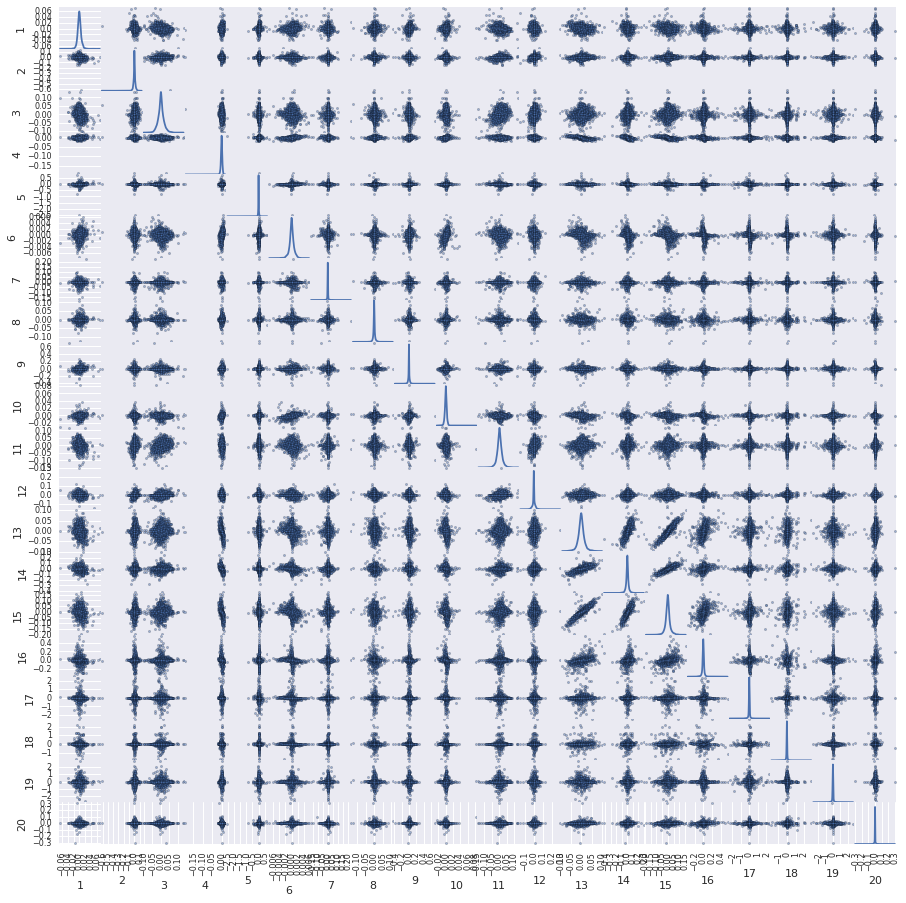

In [30]:
# _ = scatter_matrix(data_values_indexed_scaled_logret)   # takes long time, becareful, save work first
dvislr = data_values_indexed_scaled_logret

_ = scatter_matrix(
      pd.concat(
      [ 
        dvislr[ 1],dvislr[ 2],dvislr[ 3],dvislr[ 4],dvislr[ 5],dvislr[ 6],dvislr[ 7],dvislr[ 8],dvislr[ 9],dvislr[10],
        dvislr[11],dvislr[12],dvislr[13],dvislr[14],dvislr[15],dvislr[16],dvislr[17],dvislr[18],dvislr[19],dvislr[20],
      ], axis=1), figsize=(15, 15), diagonal='kde')


In [31]:
data_values_indexed_scaled_logret.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
2016-05-27,0.001121,0.018343,0.001988,-0.003885,-0.009057,0.000045,0.000530,0.011456,0.009254,0.000556,...,-0.000951,-0.000468,0.016122,0.019636,0.006343,0.007750,0.007987,0.003758,0.006461,-0.001369
2016-05-26,-0.001668,0.011589,-0.018635,0.006011,-2.533711,0.000179,0.002631,-0.009789,-0.010235,0.001175,...,-0.001425,-0.000467,-0.060287,-0.041615,-0.018910,-0.013907,-0.012077,-0.009508,-0.008621,0.001530
2016-05-25,-0.000097,-0.004998,0.004805,-0.001276,0.000000,0.000089,-0.000523,-0.014182,-0.013194,0.000186,...,-0.008977,-0.008376,-0.006281,-0.001629,0.002814,0.004152,0.005876,0.006923,0.007834,-0.001047
2016-05-24,-0.001573,0.002797,0.014192,-0.001062,0.000000,0.000000,-0.014144,-0.002160,-0.014558,0.000186,...,0.016122,0.015410,0.033655,0.015860,0.012286,0.011572,0.009707,0.008721,0.008362,-0.000241
2016-05-23,0.009202,-0.010371,0.001630,0.000000,0.000000,0.000000,0.008355,0.008190,0.027879,-0.000186,...,-0.000478,0.000942,-0.011954,-0.010965,-0.019772,-0.001039,-0.000098,0.000474,0.000373,0.000000


## Summing up the EDA

At this point, you've done a good enough job of exploratory data analysis. You've visualized our data and come to know it better. 
You've transformed it into a form that is useful for modelling, log returns, and looked at how indices relate to each other. 

What should we think so far?

Cloud Datalab is working great. With just a few lines of code, you were able to munge the data, visualize the changes, and make decisions. You could easily analyze and iterate. This is a common feature of iPython, but the advantage here is that Cloud Datalab is a managed service that you can simply click and use, so you can focus on your analysis.

## Feature selection

At this point, we can see a model:

* We'll predict whether the USDMXN close today will be higher or lower than yesterday.

Predicting whether the log return of the USDMXN is positive or negative is a classification problem. 
That is, we want to choose one option from a finite set of options, in this case positive or negative. 
This is the base case of classification where we have only two values to choose from, known as binary classification, or logistic regression.

Machine learning models are very good at finding weak signals from data.
In machine learning, as in most things, there are subtle tradeoffs happening, but in general good data is better than good algorithms, which are better than good frameworks. 
You need all three pillars but in that order of importance: data, algorithms, frameworks.

## TensorFlow

[TensorFlow](https://tensorflow.org) is an open source software library, initiated by Google, for numerical computation using data flow graphs. TensorFlow is based on Google's machine learning expertise and is the next generation framework used internally at Google for tasks such as translation and image recognition. It's a wonderful framework for machine learning because it's expressive, efficient, and easy to use.

### Feature engineering for TensorFlow

From a training and testing perspective, time series data is easy. Training data should come from events that happened before test data events, and be contiguous in time.  Otherwise,  your model would be trained on events from "the future", at least as compared to the test data. It would then likely perform badly in practice, because you can’t really have access to data from the future. That means random sampling or cross validation don't apply to time series data. Decide on a training-versus-testing split, and divide your data into training and test datasets.

In this case, you'll create the features together with two additional columns:

* usdmxn_logret_positive, which is 1 if the log return of the USDMXN close is positive, and 0 otherwise. 
* usdmxn_logret_negative, which is 1 if the log return of the USDMXN close is negative, and 1 otherwise. 

We'll use 80% of our data for training and 20% for testing.

# Model 1: Binary Classification (BC) = Logistic Regression (LR)

## Model 1: Step 01: Indicator Columns

In [32]:
# Initialize indicator columns to 0
data_values_indexed_scaled_logret['usdmxn_logret_positive'] = 0
data_values_indexed_scaled_logret['usdmxn_logret_negative'] = 0

# Populate results columns according to actual usdmxn returns (positive or negative)
data_values_indexed_scaled_logret.ix[data_values_indexed_scaled_logret[1] >= 0, 'usdmxn_logret_positive'] = 1
data_values_indexed_scaled_logret.ix[data_values_indexed_scaled_logret[1] <  0, 'usdmxn_logret_negative'] = 1

data_values_indexed_scaled_logret.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,usdmxn_logret_positive,usdmxn_logret_negative
0,,,,,,,,,,,,,,,,,,,,,
2016-05-27,0.001121,0.018343,0.001988,-0.003885,-0.009057,0.000045,0.000530,0.011456,0.009254,0.000556,...,0.016122,0.019636,0.006343,0.007750,0.007987,0.003758,0.006461,-0.001369,1,0
2016-05-26,-0.001668,0.011589,-0.018635,0.006011,-2.533711,0.000179,0.002631,-0.009789,-0.010235,0.001175,...,-0.060287,-0.041615,-0.018910,-0.013907,-0.012077,-0.009508,-0.008621,0.001530,0,1
2016-05-25,-0.000097,-0.004998,0.004805,-0.001276,0.000000,0.000089,-0.000523,-0.014182,-0.013194,0.000186,...,-0.006281,-0.001629,0.002814,0.004152,0.005876,0.006923,0.007834,-0.001047,0,1
2016-05-24,-0.001573,0.002797,0.014192,-0.001062,0.000000,0.000000,-0.014144,-0.002160,-0.014558,0.000186,...,0.033655,0.015860,0.012286,0.011572,0.009707,0.008721,0.008362,-0.000241,0,1
2016-05-23,0.009202,-0.010371,0.001630,0.000000,0.000000,0.000000,0.008355,0.008190,0.027879,-0.000186,...,-0.011954,-0.010965,-0.019772,-0.001039,-0.000098,0.000474,0.000373,0.000000,1,0


## Model 1: Step 02: Split data into training, test

### training test data empty shell

In [33]:
# training_test_data
# col 01-02 = 02 cols = indicators of results
# col 03-88 = 86 cols = inputs
training_test_data = pd.DataFrame(
  columns=[
    'usdmxn_logret_positive', 'usdmxn_logret_negative',
    '1','2','3','4','5','6','7','8','9','10',
    '11','12','13','14','15','16','17','18','19','20',
    '21','22','23','24','25','26','27','28','29','30',
    '31','32','33','34','35','36','37','38','39','40',
    '41','42','43','44','45','46','47','48','49','50',
    '51','52','53','54','55','56','57','58','59','60',
    '61','62','63','64','65','66','67','68','69','70',
    '71','72','73','74','75','76','77','78','79','80',
    '81','82','83','84','85','86',
  ])

training_test_data.head()

,usdmxn_logret_positive,usdmxn_logret_negative,1,2,3,4,5,6,7,8,...,77,78,79,80,81,82,83,84,85,86


### check rows

In [34]:
# 2000/01/07 to 2016/05/27 = 1 header row + 4279 data rows
# print data_values_indexed_scaled_logret.head()
# print data_values_indexed_scaled_logret.tail()
print 'NumRowsIncludeHeader = len(data_values_indexed_scaled_logret) = ' + str(len(data_values_indexed_scaled_logret))

NumRowsIncludeHeader = len(data_values_indexed_scaled_logret) = 4280


### Read data into variables

In [35]:
# row 0      = header
# row 1-4279 = data
# NumRowsIncludeHeader = len(data_values_indexed_scaled_logret) = 4280 = 0-4279
# Start from row 7, so we can have up to (7-1) lookback days

for i in range(7, len(data_values_indexed_scaled_logret)): # [7, 4280) = [7,4279] 
  
  usdmxn_logret_positive = data_values_indexed_scaled_logret['usdmxn_logret_positive'].ix[i]
  usdmxn_logret_negative = data_values_indexed_scaled_logret['usdmxn_logret_negative'].ix[i]
#   v_001_Tm005 = data_values_indexed_scaled_logret['1'].ix[i-5]  # lookback 1d

  v_001_Tm000 = data_values_indexed_scaled_logret[1].ix[i]
  v_002_Tm000 = data_values_indexed_scaled_logret[2].ix[i]
  v_003_Tm000 = data_values_indexed_scaled_logret[3].ix[i]
  v_004_Tm000 = data_values_indexed_scaled_logret[4].ix[i]
  v_005_Tm000 = data_values_indexed_scaled_logret[5].ix[i]
  v_006_Tm000 = data_values_indexed_scaled_logret[6].ix[i]
  v_007_Tm000 = data_values_indexed_scaled_logret[7].ix[i]
  v_008_Tm000 = data_values_indexed_scaled_logret[8].ix[i]
  v_009_Tm000 = data_values_indexed_scaled_logret[9].ix[i]
  v_010_Tm000 = data_values_indexed_scaled_logret[10].ix[i]

  v_011_Tm000 = data_values_indexed_scaled_logret[11].ix[i]
  v_012_Tm000 = data_values_indexed_scaled_logret[12].ix[i]
  v_013_Tm000 = data_values_indexed_scaled_logret[13].ix[i]
  v_014_Tm000 = data_values_indexed_scaled_logret[14].ix[i]
  v_015_Tm000 = data_values_indexed_scaled_logret[15].ix[i]
  v_016_Tm000 = data_values_indexed_scaled_logret[16].ix[i]
  v_017_Tm000 = data_values_indexed_scaled_logret[17].ix[i]
  v_018_Tm000 = data_values_indexed_scaled_logret[18].ix[i]
  v_019_Tm000 = data_values_indexed_scaled_logret[19].ix[i]
  v_020_Tm000 = data_values_indexed_scaled_logret[20].ix[i]
  
  v_021_Tm000 = data_values_indexed_scaled_logret[21].ix[i]
  v_022_Tm000 = data_values_indexed_scaled_logret[22].ix[i]
  v_023_Tm000 = data_values_indexed_scaled_logret[23].ix[i]
  v_024_Tm000 = data_values_indexed_scaled_logret[24].ix[i]
  v_025_Tm000 = data_values_indexed_scaled_logret[25].ix[i]
  v_026_Tm000 = data_values_indexed_scaled_logret[26].ix[i]
  v_027_Tm000 = data_values_indexed_scaled_logret[27].ix[i]
  v_028_Tm000 = data_values_indexed_scaled_logret[28].ix[i]
  v_029_Tm000 = data_values_indexed_scaled_logret[29].ix[i]
  v_030_Tm000 = data_values_indexed_scaled_logret[30].ix[i]

  v_031_Tm000 = data_values_indexed_scaled_logret[31].ix[i]
  v_032_Tm000 = data_values_indexed_scaled_logret[32].ix[i]
  v_033_Tm000 = data_values_indexed_scaled_logret[33].ix[i]
  v_034_Tm000 = data_values_indexed_scaled_logret[34].ix[i]
  v_035_Tm000 = data_values_indexed_scaled_logret[35].ix[i]
  v_036_Tm000 = data_values_indexed_scaled_logret[36].ix[i]
  v_037_Tm000 = data_values_indexed_scaled_logret[37].ix[i]
  v_038_Tm000 = data_values_indexed_scaled_logret[38].ix[i]
  v_039_Tm000 = data_values_indexed_scaled_logret[39].ix[i]
  v_040_Tm000 = data_values_indexed_scaled_logret[40].ix[i]

  v_041_Tm000 = data_values_indexed_scaled_logret[41].ix[i]
  v_042_Tm000 = data_values_indexed_scaled_logret[42].ix[i]
  v_043_Tm000 = data_values_indexed_scaled_logret[43].ix[i]
  v_044_Tm000 = data_values_indexed_scaled_logret[44].ix[i]
  v_045_Tm000 = data_values_indexed_scaled_logret[45].ix[i]
  v_046_Tm000 = data_values_indexed_scaled_logret[46].ix[i]
  v_047_Tm000 = data_values_indexed_scaled_logret[47].ix[i]
  v_048_Tm000 = data_values_indexed_scaled_logret[48].ix[i]
  v_049_Tm000 = data_values_indexed_scaled_logret[49].ix[i]
  v_050_Tm000 = data_values_indexed_scaled_logret[50].ix[i]

  v_051_Tm000 = data_values_indexed_scaled_logret[51].ix[i]
  v_052_Tm000 = data_values_indexed_scaled_logret[52].ix[i]
  v_053_Tm000 = data_values_indexed_scaled_logret[53].ix[i]
  v_054_Tm000 = data_values_indexed_scaled_logret[54].ix[i]
  v_055_Tm000 = data_values_indexed_scaled_logret[55].ix[i]
  v_056_Tm000 = data_values_indexed_scaled_logret[56].ix[i]
  v_057_Tm000 = data_values_indexed_scaled_logret[57].ix[i]
  v_058_Tm000 = data_values_indexed_scaled_logret[58].ix[i]
  v_059_Tm000 = data_values_indexed_scaled_logret[59].ix[i]
  v_060_Tm000 = data_values_indexed_scaled_logret[60].ix[i]

  v_061_Tm000 = data_values_indexed_scaled_logret[61].ix[i]
  v_062_Tm000 = data_values_indexed_scaled_logret[62].ix[i]
  v_063_Tm000 = data_values_indexed_scaled_logret[63].ix[i]
  v_064_Tm000 = data_values_indexed_scaled_logret[64].ix[i]
  v_065_Tm000 = data_values_indexed_scaled_logret[65].ix[i]
  v_066_Tm000 = data_values_indexed_scaled_logret[66].ix[i]
  v_067_Tm000 = data_values_indexed_scaled_logret[67].ix[i]
  v_068_Tm000 = data_values_indexed_scaled_logret[68].ix[i]
  v_069_Tm000 = data_values_indexed_scaled_logret[69].ix[i]
  v_070_Tm000 = data_values_indexed_scaled_logret[70].ix[i]

  v_071_Tm000 = data_values_indexed_scaled_logret[71].ix[i]
  v_072_Tm000 = data_values_indexed_scaled_logret[72].ix[i]
  v_073_Tm000 = data_values_indexed_scaled_logret[73].ix[i]
  v_074_Tm000 = data_values_indexed_scaled_logret[74].ix[i]
  v_075_Tm000 = data_values_indexed_scaled_logret[75].ix[i]
  v_076_Tm000 = data_values_indexed_scaled_logret[76].ix[i]
  v_077_Tm000 = data_values_indexed_scaled_logret[77].ix[i]
  v_078_Tm000 = data_values_indexed_scaled_logret[78].ix[i]
  v_079_Tm000 = data_values_indexed_scaled_logret[79].ix[i]
  v_080_Tm000 = data_values_indexed_scaled_logret[80].ix[i]

  v_081_Tm000 = data_values_indexed_scaled_logret[81].ix[i]
  v_082_Tm000 = data_values_indexed_scaled_logret[82].ix[i]
  v_083_Tm000 = data_values_indexed_scaled_logret[83].ix[i]
  v_084_Tm000 = data_values_indexed_scaled_logret[84].ix[i]
  v_085_Tm000 = data_values_indexed_scaled_logret[85].ix[i]
  v_086_Tm000 = data_values_indexed_scaled_logret[86].ix[i]

  # training_test_data: append data
  training_test_data = training_test_data.append(
    {
      'usdmxn_logret_positive':usdmxn_logret_positive,
      'usdmxn_logret_negative':usdmxn_logret_negative,
      
      '1':v_001_Tm000,
      '2':v_002_Tm000,
      '3':v_003_Tm000,
      '4':v_004_Tm000,
      '5':v_005_Tm000,
      '6':v_006_Tm000,
      '7':v_007_Tm000,
      '8':v_008_Tm000,
      '9':v_009_Tm000,
      '10':v_010_Tm000,

      '11':v_011_Tm000,
      '12':v_012_Tm000,
      '13':v_013_Tm000,
      '14':v_014_Tm000,
      '15':v_015_Tm000,
      '16':v_016_Tm000,
      '17':v_017_Tm000,
      '18':v_018_Tm000,
      '19':v_019_Tm000,
      '20':v_020_Tm000,

      '21':v_021_Tm000,
      '22':v_022_Tm000,
      '23':v_023_Tm000,
      '24':v_024_Tm000,
      '25':v_025_Tm000,
      '26':v_026_Tm000,
      '27':v_027_Tm000,
      '28':v_028_Tm000,
      '29':v_029_Tm000,
      '30':v_030_Tm000,

      '31':v_031_Tm000, '32':v_032_Tm000, '33':v_033_Tm000, '34':v_034_Tm000, '35':v_035_Tm000,
      '36':v_036_Tm000, '37':v_037_Tm000, '38':v_038_Tm000, '39':v_039_Tm000, '40':v_040_Tm000,

      '41':v_041_Tm000,
      '42':v_042_Tm000,
      '43':v_043_Tm000,
      '44':v_044_Tm000,
      '45':v_045_Tm000,
      '46':v_046_Tm000,
      '47':v_047_Tm000,
      '48':v_048_Tm000,
      '49':v_049_Tm000,
      '50':v_050_Tm000,

      '51':v_051_Tm000,
      '52':v_052_Tm000,
      '53':v_053_Tm000,
      '54':v_054_Tm000,
      '55':v_055_Tm000,
      '56':v_056_Tm000,
      '57':v_057_Tm000,
      '58':v_058_Tm000,
      '59':v_059_Tm000,
      '60':v_060_Tm000,

      '61':v_061_Tm000,
      '62':v_062_Tm000,
      '63':v_063_Tm000,
      '64':v_064_Tm000,
      '65':v_065_Tm000,
      '66':v_066_Tm000,
      '67':v_067_Tm000,
      '68':v_068_Tm000,
      '69':v_069_Tm000,
      '70':v_070_Tm000,

      '71':v_071_Tm000,
      '72':v_072_Tm000,
      '73':v_073_Tm000,
      '74':v_074_Tm000,
      '75':v_075_Tm000,
      '76':v_076_Tm000,
      '77':v_077_Tm000,
      '78':v_078_Tm000,
      '79':v_079_Tm000,
      '80':v_080_Tm000,
      
      '81':v_081_Tm000,
      '82':v_082_Tm000,
      '83':v_083_Tm000,
      '84':v_084_Tm000,
      '85':v_085_Tm000,
      '86':v_086_Tm000,
      
    },
    ignore_index=True)
  
# data_values_indexed_scaled_logret: row [7,4279] 
# training_test_data               : row [0,4272] = 4273 rows
# training_test_data: col 01-02 = 02 cols = binary outputs
# training_test_data: col 03-88 = 86 cols = inputs  


In [36]:
training_test_data.describe()

,usdmxn_logret_positive,usdmxn_logret_negative,1,2,3,4,5,6,7,8,...,77,78,79,80,81,82,83,84,85,86
count,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,...,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000
mean,0.496139,0.503861,0.000155,0.000702,0.000568,0.000041,0.000619,0.000020,-0.000026,0.000202,...,-0.000297,-0.000292,-0.001013,-0.000442,0.003848,-0.000315,-0.000301,-0.000260,-0.000289,0.000054
std,0.500044,0.500044,0.006770,0.020769,0.018350,0.004673,0.041773,0.000858,0.010168,0.007852,...,0.014881,0.014750,0.099855,0.149762,0.305913,0.016318,0.015439,0.015259,0.015197,0.004519
min,0.000000,0.000000,-0.066527,-0.614143,-0.101624,-0.190591,-0.837715,-0.007372,-0.166175,-0.123921,...,-0.136928,-0.131822,-3.135494,-3.277145,-3.624341,-0.112705,-0.105936,-0.114583,-0.109933,-0.178882
25%,0.000000,0.000000,-0.003350,-0.005985,-0.008787,-0.001979,-0.003059,-0.000320,0.000000,-0.001615,...,-0.007932,-0.007635,-0.014180,-0.015385,-0.017392,-0.009142,-0.008615,-0.007857,-0.008096,-0.000083
50%,0.000000,1.000000,-0.000069,0.000000,0.000000,0.000085,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000501,-0.000542,0.000000,-0.000528,0.000000
75%,1.000000,1.000000,0.003315,0.008079,0.009256,0.002247,0.002388,0.000407,0.000000,0.001505,...,0.007049,0.006831,0.013672,0.015038,0.018019,0.008157,0.007746,0.007061,0.007395,0.000349
max,1.000000,1.000000,0.070259,0.137621,0.133531,0.020071,0.700986,0.005774,0.229973,0.108471,...,0.072736,0.082584,1.823012,4.235250,4.605170,0.081709,0.082212,0.079560,0.085061,0.176596


### Check Rows

In [37]:
# print training_test_data.head() # 1 row, 2+86 col
# print training_test_data.tail() # 1 row, 2+86 col
print 'NumRows_HeaderNo = len(training_test_data) = ' + str(len(training_test_data))

NumRows_HeaderNo = len(training_test_data) = 4273


### create the training and test data.

In [38]:
# 86 input columns
predictors_tf = training_test_data[training_test_data.columns[2:]]
predictors_tf.describe()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
count,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,...,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000
mean,0.000155,0.000702,0.000568,0.000041,0.000619,0.000020,-0.000026,0.000202,0.000106,0.000070,...,-0.000297,-0.000292,-0.001013,-0.000442,0.003848,-0.000315,-0.000301,-0.000260,-0.000289,0.000054
std,0.006770,0.020769,0.018350,0.004673,0.041773,0.000858,0.010168,0.007852,0.026645,0.003443,...,0.014881,0.014750,0.099855,0.149762,0.305913,0.016318,0.015439,0.015259,0.015197,0.004519
min,-0.066527,-0.614143,-0.101624,-0.190591,-0.837715,-0.007372,-0.166175,-0.123921,-0.385704,-0.024960,...,-0.136928,-0.131822,-3.135494,-3.277145,-3.624341,-0.112705,-0.105936,-0.114583,-0.109933,-0.178882
25%,-0.003350,-0.005985,-0.008787,-0.001979,-0.003059,-0.000320,0.000000,-0.001615,-0.002253,-0.001338,...,-0.007932,-0.007635,-0.014180,-0.015385,-0.017392,-0.009142,-0.008615,-0.007857,-0.008096,-0.000083
50%,-0.000069,0.000000,0.000000,0.000085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000073,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000501,-0.000542,0.000000,-0.000528,0.000000
75%,0.003315,0.008079,0.009256,0.002247,0.002388,0.000407,0.000000,0.001505,0.002380,0.001596,...,0.007049,0.006831,0.013672,0.015038,0.018019,0.008157,0.007746,0.007061,0.007395,0.000349
max,0.070259,0.137621,0.133531,0.020071,0.700986,0.005774,0.229973,0.108471,0.697777,0.083623,...,0.072736,0.082584,1.823012,4.235250,4.605170,0.081709,0.082212,0.079560,0.085061,0.176596


In [39]:
# 2 output columns
classes_tf = training_test_data[training_test_data.columns[:2]]
classes_tf.describe()

,usdmxn_logret_positive,usdmxn_logret_negative
count,4273.000000,4273.000000
mean,0.496139,0.503861
std,0.500044,0.500044
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [40]:
# Split: train data = 80%
training_set_size = int(len(training_test_data) * 0.8)
print 'training_set_size=' + str(training_set_size )
# Split: test data = 20%
test_set_size = len(training_test_data) - training_set_size
print 'test_set_size=' + str(test_set_size )

training_set_size=3418
test_set_size=855


In [41]:
# train: row 0 to 3417
# input: cols 86
training_predictors_tf = predictors_tf[:training_set_size]
# print training_predictors_tf.head()
print training_predictors_tf.tail()

             1    2         3         4    5         6    7         8    9  \
3413 -0.000361  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0   
3414 -0.008273  0.0  0.000000 -0.000470  0.0 -0.000283  0.0  0.000256  0.0   
3415  0.000424  0.0  0.007864  0.001318  0.0  0.000756  0.0 -0.000064  0.0   
3416 -0.003949  0.0 -0.005249  0.005099  0.0  0.000284  0.0 -0.000513  0.0   
3417  0.003242  0.0 -0.002614 -0.002458  0.0 -0.001606  0.0 -0.002336  0.0   

            10 ...         77        78        79        80        81  \
3413  0.000000 ...   0.000000  0.000000  0.000000  0.000000  0.000000   
3414  0.002112 ...  -0.003412 -0.004467 -0.003683 -0.007491 -0.010101   
3415  0.003294 ...  -0.013437 -0.012901  0.014815  0.015038  0.025447   
3416  0.002517 ...  -0.006318 -0.005723 -0.014815 -0.015038 -0.005141   
3417 -0.001338 ...   0.008625  0.008021 -0.010969 -0.011132 -0.020305   

            82        83        84        85   86  
3413  0.000000  0.000000  0.000000  0.00

In [42]:
# train: row 0 to 3417
# output: cols 2
training_classes_tf = classes_tf[:training_set_size]
print training_classes_tf.head()
print training_classes_tf.tail()

   usdmxn_logret_positive  usdmxn_logret_negative
0                     1.0                     0.0
1                     0.0                     1.0
2                     1.0                     0.0
3                     1.0                     0.0
4                     0.0                     1.0
      usdmxn_logret_positive  usdmxn_logret_negative
3413                     0.0                     1.0
3414                     0.0                     1.0
3415                     1.0                     0.0
3416                     0.0                     1.0
3417                     1.0                     0.0


In [43]:
4272-3417

855

In [44]:
# test: row 3418 to 4272 = new rows 0 to 854 = 855 test rows predictors
# input: cols 86
test_predictors_tf = predictors_tf[training_set_size:]
# print test_predictors_tf.head()
print test_predictors_tf.tail()

             1    2         3         4    5         6    7         8    9  \
4268 -0.001567  0.0  0.031548  0.003070  0.0  0.002047  0.0  0.000000  0.0   
4269  0.000940  0.0 -0.031548  0.004451  0.0  0.000098  0.0  0.000000  0.0   
4270 -0.000031  0.0  0.000000 -0.007946  0.0  0.000000  0.0 -0.007984  0.0   
4271  0.006951  0.0 -0.040574 -0.008475  0.0  0.000195  0.0  0.000000  0.0   
4272  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0   

            10    ...           77        78        79        80   81  \
4268  0.003868    ...    -0.004005 -0.002007 -0.022728 -0.011173  0.0   
4269 -0.003784    ...     0.004005  0.003348  0.011300  0.011173  0.0   
4270 -0.000420    ...     0.006711  0.004032 -0.022473 -0.022223  0.0   
4271 -0.005438    ...    -0.004032  0.000000  0.045462  0.044951  0.0   
4272  0.000000    ...     0.000000  0.000000  0.000000  0.000000  0.0   

            82        83   84        85        86  
4268 -0.005398 -0.004040  0.0 -0.004046 

In [45]:
# test: row 3418 to 4272 = new rows 0 to 854 = 855 test rows classes
# output: cols 2
test_classes_tf = classes_tf[training_set_size:]
print test_classes_tf.head()
print test_classes_tf.tail()

      usdmxn_logret_positive  usdmxn_logret_negative
3418                     0.0                     1.0
3419                     0.0                     1.0
3420                     0.0                     1.0
3421                     1.0                     0.0
3422                     0.0                     1.0
      usdmxn_logret_positive  usdmxn_logret_negative
4268                     0.0                     1.0
4269                     1.0                     0.0
4270                     0.0                     1.0
4271                     1.0                     0.0
4272                     1.0                     0.0


In [46]:
# train input
training_predictors_tf.describe()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
count,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,...,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000
mean,0.000162,0.000928,0.000789,0.000084,0.000774,0.000016,-0.000033,0.000215,0.000134,0.000070,...,-0.000265,-0.000261,-0.001201,-0.000480,0.004964,-0.000271,-0.000266,-0.000261,-0.000257,0.000045
std,0.007166,0.018233,0.017555,0.003607,0.046707,0.000819,0.011369,0.008725,0.027227,0.003593,...,0.015922,0.015820,0.111052,0.166996,0.341838,0.017410,0.016495,0.016437,0.016328,0.004785
min,-0.066527,-0.139062,-0.101624,-0.020762,-0.837715,-0.006117,-0.166175,-0.123921,-0.385704,-0.024960,...,-0.136928,-0.131822,-3.135494,-3.277145,-3.624341,-0.112705,-0.105936,-0.114583,-0.109933,-0.178882
25%,-0.003533,-0.007876,-0.008535,-0.001973,-0.008843,-0.000287,-0.000070,-0.002171,-0.005071,-0.001348,...,-0.008542,-0.008332,-0.015230,-0.016964,-0.023741,-0.009922,-0.009276,-0.009069,-0.008869,0.000000
50%,-0.000146,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000072,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000452,-0.000463,-0.000424,-0.000385,0.000000
75%,0.003459,0.009755,0.009339,0.002211,0.007944,0.000362,0.000513,0.002101,0.005237,0.001598,...,0.007768,0.007678,0.014760,0.016770,0.025629,0.009242,0.008563,0.008436,0.008173,0.000160
max,0.070259,0.107631,0.130605,0.020071,0.700986,0.005268,0.229973,0.108471,0.697777,0.083623,...,0.072736,0.082584,1.823012,4.235250,4.605170,0.081709,0.082212,0.079560,0.085061,0.176596


In [47]:
# test input
test_predictors_tf.describe()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
count,855.000000,855.000000,855.000000,855.000000,855.0,855.000000,855.0,855.000000,855.000000,855.000000,...,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,0.000130,-0.000199,-0.000319,-0.000132,0.0,0.000039,0.0,0.000149,-0.000007,0.000069,...,-0.000422,-0.000413,-0.000262,-0.000292,-0.000613,-0.000492,-0.000440,-0.000256,-0.000415,0.000090
std,0.004878,0.028752,0.021224,0.007558,0.0,0.000999,0.0,0.001946,0.024192,0.002766,...,0.009662,0.009325,0.023094,0.024740,0.023628,0.010918,0.010184,0.009150,0.009408,0.003248
min,-0.026806,-0.614143,-0.098533,-0.190591,0.0,-0.007372,0.0,-0.007984,-0.284421,-0.017056,...,-0.046813,-0.048310,-0.171332,-0.207907,-0.273952,-0.036455,-0.035735,-0.079178,-0.034788,-0.021236
25%,-0.002540,0.000000,-0.009901,-0.002029,0.0,-0.000479,0.0,-0.000415,0.000000,-0.001301,...,-0.006391,-0.005861,-0.011578,-0.011268,-0.004630,-0.007294,-0.006931,-0.001932,-0.006212,-0.000806
50%,0.000031,0.000000,0.000000,0.000197,0.0,0.000095,0.0,0.000000,0.000000,0.000082,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000703,-0.000793,0.000000,-0.000803,0.000000
75%,0.002771,0.000000,0.008673,0.002493,0.0,0.000591,0.0,0.000590,0.000000,0.001540,...,0.004608,0.004164,0.010860,0.010267,0.000000,0.004837,0.004835,0.000000,0.004054,0.001107
max,0.018581,0.137621,0.133531,0.011436,0.0,0.005774,0.0,0.025348,0.268626,0.018529,...,0.041452,0.040235,0.133306,0.218806,0.273952,0.051000,0.049455,0.058788,0.044599,0.064242


Define some metrics here to evaluate the models.

* [Precision](https://en.wikipedia.org/wiki/Precision_and_recall#Precision) -  The ability of the classifier not to label as positive a sample that is negative.
* [Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall) - The ability of the classifier to find all the positive samples.
* [F1 Score](https://en.wikipedia.org/wiki/F1_score) - A weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
* Accuracy - The percentage correctly predicted in the test data.

In [48]:
def tf_confusion_metrics(model, actual_classes, session, feed_dict):
  predictions = tf.argmax(model, 1)
  actuals = tf.argmax(actual_classes, 1)

  ones_like_actuals = tf.ones_like(actuals)
  zeros_like_actuals = tf.zeros_like(actuals)
  ones_like_predictions = tf.ones_like(predictions)
  zeros_like_predictions = tf.zeros_like(predictions)

  tp_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, ones_like_actuals), 
        tf.equal(predictions, ones_like_predictions)
      ), 
      "float"
    )
  )

  tn_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, zeros_like_actuals), 
        tf.equal(predictions, zeros_like_predictions)
      ), 
      "float"
    )
  )

  fp_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, zeros_like_actuals), 
        tf.equal(predictions, ones_like_predictions)
      ), 
      "float"
    )
  )

  fn_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, ones_like_actuals), 
        tf.equal(predictions, zeros_like_predictions)
      ), 
      "float"
    )
  )

  tp, tn, fp, fn = \
    session.run(
      [tp_op, tn_op, fp_op, fn_op], 
      feed_dict
    )

  tpr = float(tp)/(float(tp) + float(fn))
  fpr = float(fp)/(float(tp) + float(fn))

  accuracy = (float(tp) + float(tn))/(float(tp) + float(fp) + float(fn) + float(tn))

  recall = tpr
  precision = float(tp)/(float(tp) + float(fp))
  
  f1_score = (2 * (precision * recall)) / (precision + recall)
  
  print 'Precision = ', precision
  print 'Recall = ', recall
  print 'F1 Score = ', f1_score
  print 'Accuracy = ', accuracy

### Binary classification with TensorFlow

Now, get some tensors flowing. The model is binary classification expressed in TensorFlow.

In [49]:
# tensorflow session
sess = tf.Session()

In [50]:
# Define variables for the number of predictors and number of classes to remove magic numbers from our code.
num_predictors = len(training_predictors_tf.columns) # 24-6=18 in the default case
num_classes = len(training_classes_tf.columns) # 2 in the default case
print 'num_predictors=' + str(num_predictors)
print 'num_classes=' + str(num_classes)

num_predictors=86
num_classes=2


In [51]:
# Define placeholders for the data we feed into the process - feature data and actual classes.
# input = 18
feature_data = tf.placeholder("float", [None, num_predictors])
# output = 2
actual_classes = tf.placeholder("float", [None, num_classes])

In [52]:
# Define a matrix of weights and initialize it with some small random values.
weights = tf.Variable(tf.truncated_normal([num_predictors, num_classes], stddev=0.0001))
biases = tf.Variable(tf.ones([num_classes]))

In [53]:
# Define our model...
# Here we take a softmax regression of the product of our feature data and weights.
model = tf.nn.softmax(tf.matmul(feature_data, weights) + biases)

# Define a cost function (we're using the cross entropy).
cost = -tf.reduce_sum(actual_classes*tf.log(model))

# Define a training step...
# Here we use gradient descent with a learning rate of 0.01 using the cost function we just defined.
training_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

init = tf.initialize_all_variables()
sess.run(init)

In [54]:
# BEFORE the model has been run, ie. not yet trained
# display weights
w_86_2 = sess.run(weights)    
print w_86_2 

# Expect something like this (small numbers e-05): 
# [[ -6.66152628e-05  -6.49469657e-05]
#  [  2.86067752e-05   3.27789494e-05]
#  [  4.73170294e-05   1.85125769e-04]
#  [ -6.42955492e-05   4.16024632e-05]
#  [ -1.54488771e-05  -2.10903818e-05]
#  [  4.62506796e-05  -2.98624745e-05]
#  [ -5.35508079e-05  -1.30856875e-04]
#  [ -1.70812025e-04   1.33106529e-04]
#  [ -1.45097118e-04  -1.80459567e-04]
#  [  1.02448161e-04   8.27739277e-05]
#  [ -1.33277281e-04  -4.04360726e-05]
#  [ -1.36186543e-04   8.62382149e-05]
#  [  2.80324894e-05  -2.20580205e-05]
#  [ -4.52000713e-05   2.54859442e-05]
#  [ -6.20259525e-05  -6.95227573e-05]
#  [  1.68935469e-04  -4.03221093e-05]
#  [ -9.51008842e-05   4.10227585e-05]
#  [ -5.90909331e-05  -9.20566745e-05]]

[[ -4.48507017e-05   6.96890420e-05]
 [  7.66801459e-05   9.82841593e-05]
 [  1.38111573e-04  -1.93268919e-04]
 [ -5.26692493e-05  -6.73742688e-05]
 [  3.71968999e-05   1.34312668e-05]
 [  1.09417582e-04   3.01960335e-05]
 [ -1.04316323e-05  -2.88355914e-05]
 [ -5.52543497e-05   7.59914692e-05]
 [ -3.54105869e-05  -5.31511942e-05]
 [ -5.38465356e-05   2.05603719e-05]
 [ -3.98812626e-05   1.04552899e-04]
 [ -3.08963427e-05  -7.74173386e-05]
 [ -2.52508416e-05  -1.14712238e-04]
 [ -4.85951659e-06  -1.56367187e-05]
 [ -6.53060051e-05  -7.01371246e-05]
 [  1.55830145e-04  -9.08078655e-05]
 [ -9.36428914e-05  -1.32083966e-04]
 [ -1.10574911e-05   3.92119582e-05]
 [ -6.83419130e-05  -5.20940412e-05]
 [ -6.62537932e-05  -6.11158976e-05]
 [ -1.55322632e-04  -2.01864259e-06]
 [ -3.36190237e-06   1.01677681e-04]
 [ -4.50288062e-05  -1.50519161e-04]
 [ -4.53929570e-05   8.17245600e-05]
 [ -1.71060310e-05  -2.88106257e-05]
 [ -1.42823788e-04   2.08809997e-05]
 [  5.40134533e-05  -1.61045537e-04]
 

We'll train our model in the following snippet. The approach of TensorFlow to executing graph operations allows fine-grained control over the process. Any operation you provide to the session as part of the run operation will be executed and the results returned. You can provide a list of multiple operations.

You'll train the model over 30,000 iterations using the full dataset each time. Every thousandth iteration we'll assess the accuracy of the model on the training data to assess progress.

In [55]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(actual_classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

for i in range(1, 30001):
  sess.run(
    training_step, 
    feed_dict={
      feature_data: training_predictors_tf.values, 
      actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
    }
  )
  if i%5000 == 0:
    print i, sess.run(
      accuracy,
      feed_dict={
        feature_data: training_predictors_tf.values, 
        actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
      }
    )
    
# Expect:
# 5000 0.603862
# 10000 0.630778
# 15000 0.639555
# 20000 0.654184
# 25000 0.660035
# 30000 0.666764

5000 0.603862
10000 0.630778
15000 0.639555
20000 0.654184
25000 0.660035
30000 0.666764


Accuracy  66.6% on training data
That is OK, better than random.

In [56]:
feed_dict= {
  feature_data: test_predictors_tf.values,
  actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
}

tf_confusion_metrics(model, actual_classes, sess, feed_dict)

# Precision =  0.541176470588
# Recall =  0.555555555556
# F1 Score =  0.548271752086
# Accuracy =  0.556725146199


Precision =  0.541176470588
Recall =  0.555555555556
F1 Score =  0.548271752086
Accuracy =  0.556725146199


Accuracy 55.6% on test data.

In [57]:
# AFTER the model has been run, ie. trained
# display weights
w_86_2 = sess.run(weights)    
print w_86_2 

[[  2.97912788e+00  -2.97910261e+00]
 [ -2.33156490e+00   2.33174038e+00]
 [ -2.88709927e+00   2.88704419e+00]
 [ -2.34947872e+00   2.34935856e+00]
 [  2.68783474e+00  -2.68778396e+00]
 [ -6.29162431e-01   6.29302263e-01]
 [ -1.05463243e+00   1.05452597e+00]
 [  4.46805000e-01  -4.46783483e-01]
 [  2.89540863e+00  -2.89549708e+00]
 [ -1.88037264e+00   1.88033879e+00]
 [ -2.40202951e+00   2.40209413e+00]
 [ -4.53470170e-01   4.53361809e-01]
 [ -2.49848723e+00   2.49834776e+00]
 [ -1.88810611e+00   1.88808978e+00]
 [  6.61138475e-01  -6.61274254e-01]
 [ -8.86345446e-01   8.86149049e-01]
 [  3.19705880e-03  -3.61388852e-03]
 [  6.86494112e-02  -6.81173876e-02]
 [  3.28893177e-02  -3.30598950e-02]
 [  2.54064828e-01  -2.55072325e-01]
 [ -6.88803732e-01   6.88425958e-01]
 [ -8.15598369e-01   8.15429926e-01]
 [ -2.38564670e-01   2.37424880e-01]
 [ -1.79175556e-01   1.79119200e-01]
 [ -1.29766083e+00   1.29752028e+00]
 [ -2.23357701e+00   2.23345447e+00]
 [ -2.45748162e+00   2.45737433e+00]
 

In [58]:
# grab a sample input row from the test set
sample_input_1_86 = test_predictors_tf[:10]
# HTML(pd.DataFrame(sample_input_1_86).to_html())
sample_input_1_86

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
3418,-0.009090,0.000000,-0.005208,-0.001321,0.0,-0.001320,0.0,-0.000032,0.0,-0.004003,...,0.010644,0.009634,0.007299,0.007407,0.015190,0.004295,0.002928,0.001929,0.001631,0.0
3419,-0.004607,0.000000,0.005208,-0.000189,0.0,0.000000,0.0,0.000000,0.0,0.003767,...,0.000000,0.000000,-0.003656,0.003724,-0.015190,0.009887,0.008442,0.005808,0.005776,0.0
3420,-0.002550,0.000000,-0.018112,0.003590,0.0,0.001415,0.0,0.000064,0.0,0.001574,...,-0.009681,-0.009634,0.003656,0.000000,0.005038,-0.006808,-0.006485,-0.003876,-0.005104,0.0
3421,0.007950,0.000000,-0.015267,0.005409,0.0,0.000472,0.0,-0.000128,0.0,0.002129,...,-0.020029,-0.018053,-0.021740,-0.025784,-0.034743,-0.012057,-0.009941,-0.013449,-0.010131,0.0
3422,-0.001446,0.000000,0.007605,-0.001616,0.0,-0.001698,0.0,0.000096,0.0,-0.007078,...,0.018104,0.015181,-0.007143,-0.007246,0.000000,0.001830,0.000679,0.001910,0.001332,0.0
3423,0.003549,0.000000,0.033638,-0.000760,0.0,0.000283,0.0,-0.000192,0.0,-0.003286,...,0.004819,0.004792,-0.010620,-0.007194,0.004890,0.007558,0.006816,0.007678,0.006304,0.0
3424,0.004078,0.000834,-0.023408,0.002090,0.0,-0.000094,0.0,-0.000128,0.0,-0.005841,...,-0.004819,-0.002878,0.000000,0.003591,-0.014599,-0.002867,-0.000488,0.000000,0.001534,0.0
3425,-0.008130,0.000000,0.028685,-0.003324,0.0,-0.001978,0.0,0.000000,0.0,-0.003024,...,0.024332,0.023257,0.000000,0.000000,0.000000,0.022956,0.021719,0.019456,0.017718,0.0
3426,-0.003497,0.000000,0.016000,-0.002084,0.0,0.000565,0.0,-0.002745,0.0,0.000387,...,-0.002951,-0.003914,-0.003515,0.000000,0.000000,0.002409,0.000000,0.001967,0.002053,0.0
3427,0.004001,-0.000834,-0.008032,0.001894,0.0,0.001602,0.0,0.000032,0.0,0.005982,...,-0.012883,-0.012808,-0.013938,-0.017826,-0.028573,-0.022704,-0.021328,-0.021422,-0.021306,0.0


In [59]:
sample_input_1_86.describe()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
count,10.000000,1.000000e+01,1.000000e+01,10.000000,10.0,10.000000,10.0,10.000000,10.0,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.0
mean,-0.000974,6.624475e-18,2.110896e-03,0.000369,0.0,-0.000075,0.0,-0.000303,0.0,-0.000939,...,0.000754,0.000558,-0.004966,-0.004333,-0.006799,0.000450,0.000234,7.285839e-18,-0.000019,0.0
std,0.005674,3.930009e-04,1.958315e-02,0.002771,0.0,0.001233,0.0,0.000863,0.0,0.004327,...,0.013918,0.012868,0.008670,0.010439,0.015935,0.012573,0.011518,1.124111e-02,0.010439,0.0
min,-0.009090,-8.336807e-04,-2.340809e-02,-0.003324,0.0,-0.001978,0.0,-0.002745,0.0,-0.007078,...,-0.020029,-0.018053,-0.021740,-0.025784,-0.034743,-0.022704,-0.021328,-2.142244e-02,-0.021306,0.0
25%,-0.004330,0.000000e+00,-1.345865e-02,-0.001542,0.0,-0.001014,0.0,-0.000128,0.0,-0.003824,...,-0.008465,-0.008204,-0.009750,-0.007233,-0.015042,-0.005822,-0.004986,-2.906980e-03,-0.003495,0.0
50%,-0.001998,0.000000e+00,-4.250073e-17,-0.000474,0.0,0.000141,0.0,-0.000016,0.0,-0.001318,...,-0.001476,-0.001439,-0.003586,0.000000,0.000000,0.002119,0.000340,1.919431e-03,0.001582,0.0
75%,0.003888,0.000000e+00,1.390141e-02,0.002041,0.0,0.000542,0.0,0.000024,0.0,0.001990,...,0.009187,0.008423,0.000000,0.002693,0.003667,0.006742,0.005844,4.847898e-03,0.004846,0.0
max,0.007950,8.336807e-04,3.363836e-02,0.005409,0.0,0.001602,0.0,0.000096,0.0,0.005982,...,0.024332,0.023257,0.007299,0.007407,0.015190,0.022956,0.021719,1.945587e-02,0.017718,0.0


In [60]:
# use the weights from our model to make a prediction
output_1_2 = np.dot(sample_input_1_86, w_86_2) > 0
print output_1_2
usdmxn_up = output_1_2[0,0]
usdmxn_dn = output_1_2[0,1]
if usdmxn_up >= usdmxn_dn:
  usdmxn_pred = 1 # up
else:
  usdmxn_pred = -1 # down
print 'usdmxn_pred = '+ str(usdmxn_pred)

[[False  True]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]]
usdmxn_pred = -1
